# ข้อมูลอนุกรมเวลา - Time-series data

*   ข้อมูลอนุกรมเวลา หรือ time-series data เป็นข้อมูลประเภทที่มีเวลากำกับอยู่
*   ข้อมูลในการทำการวิเคราะห์ส่วนมากจะถูกจัดเก็บอยู่ในรูปแบบของอนุกรมเวลา
*   การวิเคราะห์ที่นิยมมากสำหรับข้อมูลอนุกรมเวลา คือ การพยากรณ์ค่าในอนาคต
*   สิ่งที่นิยมพยากรณ์กันในธุรกิจ คือ การพยากรณ์ยอดขาย
*   ในข้อมูลอนุกรมเวลานั้น ประกอบด้วย 4 องค์ประกอบ
*   Trend เป็นส่วนที่แสดงถึงทิศทางการเปลี่ยนแปลง
*   Seasonal เป็นส่วนที่แสดงถึงการเปลี่ยนแปลงที่เป็นรูปแบบเดิมในช่วงสั้น
*   Cyclical เป็นส่วนที่แสดงถึงการเปลี่ยนแปลงที่เป็นรูปแบบเดิมในช่วงระยะยาว (มากกว่า 1 ปี)
*   Irregular เป็นส่วนที่เกิดขึ้นแบบสุ่ม คาดการณ์หรือพยากรณ์ไม่ได้

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/24.png width="1000px">

# Prophet Module

ในการวิเคราะห์ข้อมูลอนุกรมเวลา หรือ การพยากรณ์ข้อมูลนั้น เราจะใช้ Prophet Module ที่ถูกพัฒนาขึ้นโดย Facebook

In [1]:
# Load module ที่เราต้องการใช้ทั้งหมด

import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/thanachart/ai-builders-tabular-data/raw/main/Data/bangkok-air-quality.csv'
df = pd.read_csv(url)

In [3]:
# แสดงผลตัวอย่างข้อมูล

df.head(5)

date  pm25  pm10   o3  no2  so2  co
0  2022/2/1    68    31    9    4         
1  2022/2/2    58    35   10    6         
2  2022/2/3    66    37   15   11         
3  2022/2/4    73    48   17   15    1    
4  2022/2/5    94    54   21   13    1

In [4]:
# ตรวจสอบ data types จะพบว่า คอลัมน์ date ถูกมองว่าเป็น string หรือ text

df.dtypes

date     object
 pm25    object
 pm10    object
 o3      object
 no2     object
 so2     object
 co      object
dtype: object

In [5]:
# อ่านไฟล์ข้อมูลใหม่ โดยระบุชื่อคอลัมน์ที่มีประเภทข้อมูลเป็น date

df = pd.read_csv(url, parse_dates=['date'])

In [6]:
# ตรวจสอบ data types จะพบว่า คอลัมน์ date ถูกมองว่า date-time ถูกต้อง แต่ คอลัมภ์ pm25 ยังถูกมองเป็น string อยู่

df.dtypes

date     datetime64[ns]
 pm25            object
 pm10            object
 o3              object
 no2             object
 so2             object
 co              object
dtype: object

In [7]:
# แปลงประเภทข้อมูลของคอลัมภ์ pm25 ให้เป็น numeric

df['pm25'] = pd.to_numeric(df[' pm25'], errors='coerce')

In [8]:
# สร้าง dataframe ใหม่ ให้มีเฉพาะคอลัมน์ที่ต้องการ คือ คอลัมน์เวลา และค่าที่เราต้องการพยากรณ์

df_pm25 = df[['date', 'pm25']]

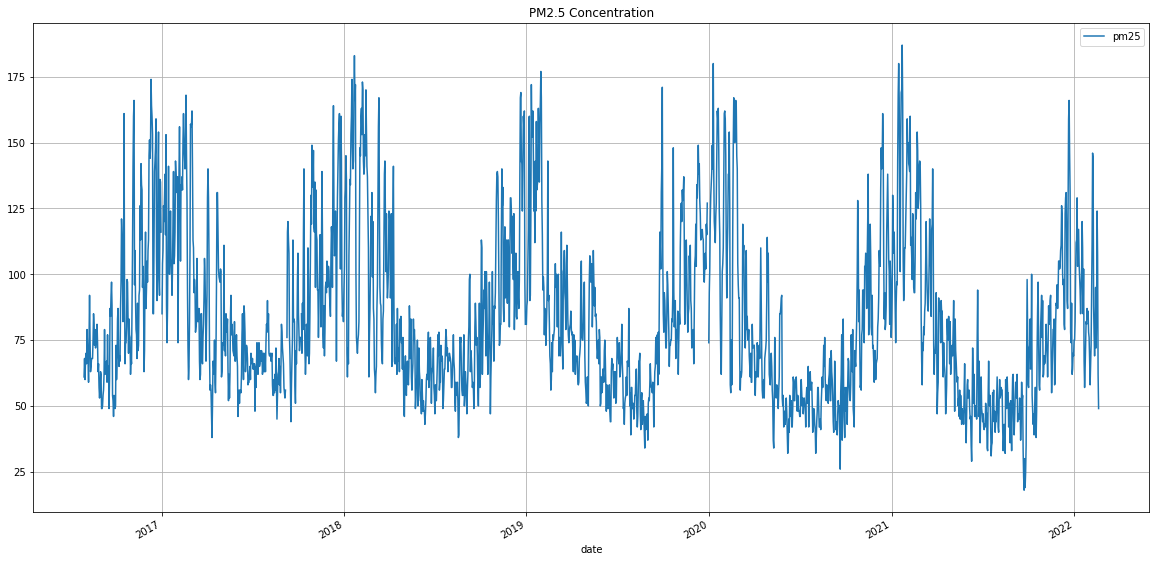

In [9]:
# plot graph

df_pm25.set_index("date").plot(title='PM2.5 Concentration', grid=True, figsize=(20,10))

In [10]:
# ใน prophet จะอ่านจากชื่อคอลัมน์ว่า อันไหนเป็น เวลา อันไหนเป็น ค่าที่ต้องพยากรณ์ โดยต้องตั้ง ให้เป็นชื่อว่า ds และ y ตามลำดับ

df_pm25 = df_pm25.rename(columns={'date': 'ds', 'pm25': 'y'})

df_pm25.tail()

ds   y
2961 2015-03-15 NaN
2962 2014-11-30 NaN
2963 2013-12-31 NaN
2964 2014-01-26 NaN
2965 2016-01-01 NaN

In [11]:
# หาวันสุดท้ายที่มีข้อมูลใน data ของเรา

df_pm25['ds'].max()

Timestamp('2022-02-19 00:00:00')

In [12]:
# สร้าง model สำหรับการทำนาย

my_model = Prophet(interval_width=0.95)

In [13]:
# train model จากข้อมูลเก่า

my_model.fit(df_pm25)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# สร้าง dataframe สำหรับวันในอดีตและอนาคตที่ต้องการทำนาย

future_dates = my_model.make_future_dataframe(periods=7)
future_dates.tail(7)

ds
2966 2022-02-20
2967 2022-02-21
2968 2022-02-22
2969 2022-02-23
2970 2022-02-24
2971 2022-02-25
2972 2022-02-26

In [15]:
# พยากรณ์ข้อมูล

forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
2968 2022-02-22  91.709315   48.331891  130.243123
2969 2022-02-23  90.765741   51.387040  133.833018
2970 2022-02-24  88.484082   47.865622  128.827818
2971 2022-02-25  86.610142   47.265461  126.907471
2972 2022-02-26  85.896377   47.649540  125.203455

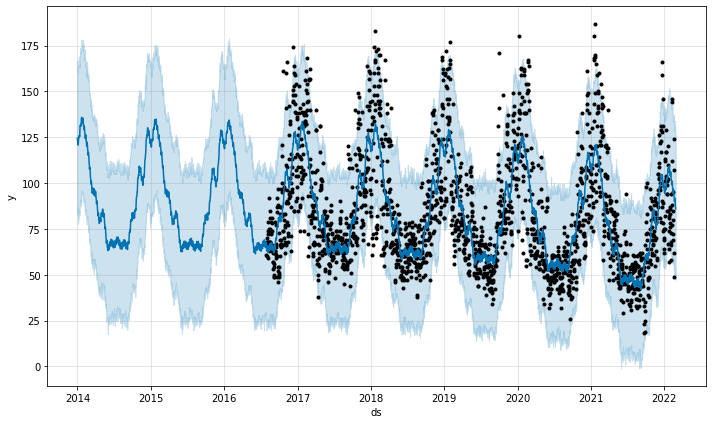

In [16]:
# แสดงผลการพยากรณ์

fig1 = my_model.plot(forecast)

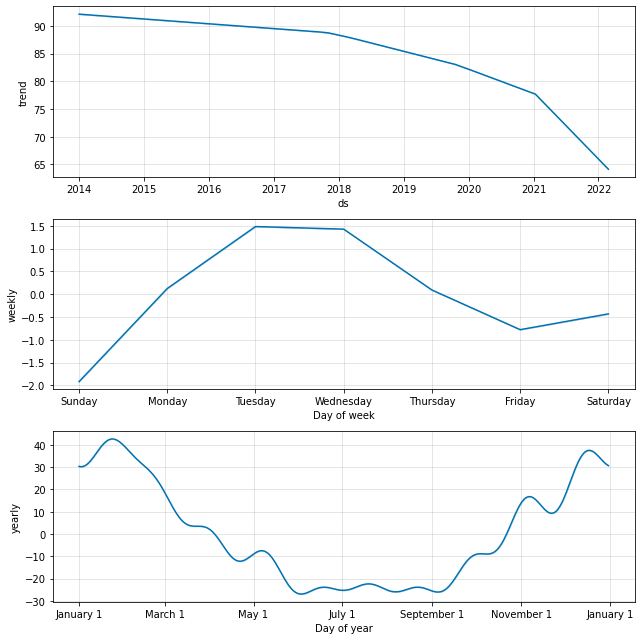

In [17]:
# แสดงผลองค์ประกอบ trend และ seasonal pattern

fig2 = my_model.plot_components(forecast)

In [18]:
# รวมค่าจริงและค่าพยากรณ์เพื่อนำไปคำนวณหาค่าความแม่นยำ

df_merge = pd.merge(df_pm25, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

ds  yhat_lower  yhat_upper        yhat     y
0 2022-02-01   65.930608  147.708919  106.149505  68.0
1 2022-02-02   62.515969  144.713815  105.393128  58.0
2 2022-02-03   61.594069  142.535550  103.332127  66.0
3 2022-02-04   60.113335  140.389501  101.723777  73.0
4 2022-02-05   62.482936  140.266012  101.328760  94.0

# Cross Validation

In [19]:
# ทำการ cross validation การทำนายผล

from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(my_model, initial='1820 days', period='10 days', horizon = '10 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [20]:
# แสดงผลการ cross validation

df_cv.head()

ds       yhat  yhat_lower  yhat_upper     y     cutoff
0 2021-07-25  51.000425    7.814762   90.868337  44.0 2021-07-24
1 2021-07-26  52.603165    9.794160   94.366707  48.0 2021-07-24
2 2021-07-27  53.400123   11.508330   94.715860  40.0 2021-07-24
3 2021-07-28  53.171324   11.872313   94.219715  45.0 2021-07-24
4 2021-07-29  51.539401   10.108437   94.142864  44.0 2021-07-24

In [21]:
# คำนวณหาค่าความแม่นยำ

from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

horizon         mse       rmse        mae      mape     mdape  coverage
0  1 days  604.231031  24.581111  19.151331  0.362698  0.243766  0.857143
1  2 days  603.907179  24.574523  19.535110  0.322168  0.317916  0.857143
2  3 days  562.071186  23.708041  19.419083  0.388954  0.229236  0.857143
3  4 days  399.765545  19.994138  14.765147  0.260006  0.156027  0.952381
4  5 days  378.645406  19.458813  16.191296  0.258156  0.171446  1.000000

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


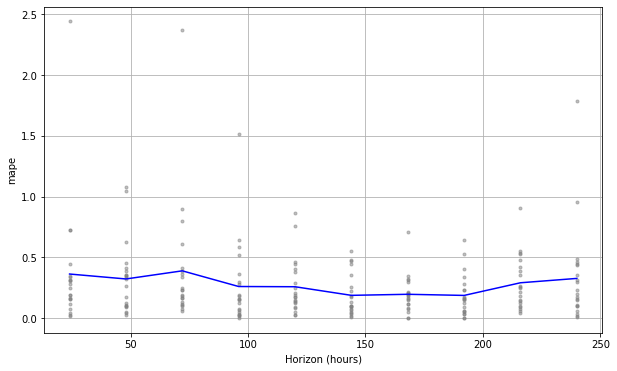

In [22]:
# แสดงผลความแม่นยำ

from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')

# Tuning Prophet Model

ในการสร้าง Prophet Model นั้น เราสามารถปรับแต่งค่า parameter ต่างๆ รวมถึงเพิ่ม regressor เข้าไปใน Model เพื่อช่วยในการทำนาย

## Trend - Parameter Tuning

หากเรามีช้อมูลอนุกรมเวลายาว อาจเป็นไปได้ว่ามีการเปลี่ยนแปลง Trend ในช่วงเวลา เช่น บางช่วง Trend เติบโตมาก บางช่วงเป็น Trend ขาลง

เราจะทำการปรับค่า changepoint_prior_scale เพื่อให้ Prophet สามารถตรวจพบการเปลี่ยนแปลงที่เกิดขึ้นได้ด้วยตัวเอง

ยิ่งใส่ค่า changepoint_prior_scale มากขึ้น จะยิ่งตรวจพบการเปลี่ยนแปลงมากขึ้น

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


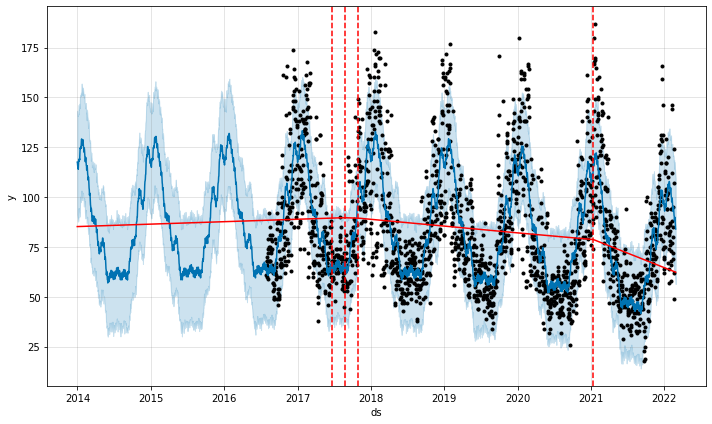

In [26]:
# set changepoint_prior_scale=0.1

my_model_trend_change = Prophet(changepoint_prior_scale=0.1)
my_model_trend_change.fit(df_pm25)
forecast = my_model_trend_change.predict(future_dates)
fig1 = my_model_trend_change.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), my_model_trend_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


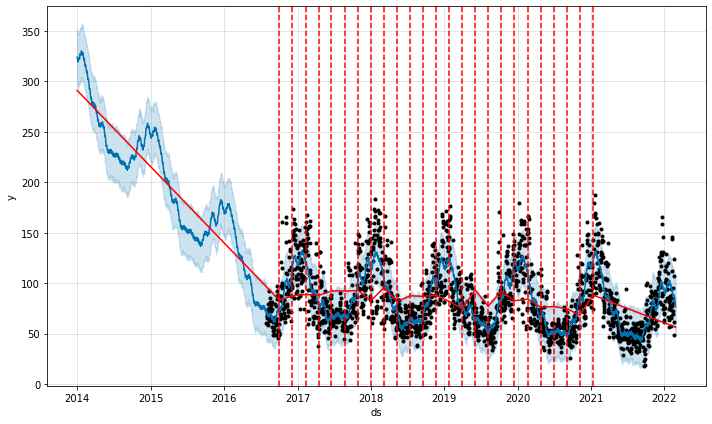

In [37]:
# set changepoint_prior_scale=10

my_model_trend_change = Prophet(changepoint_prior_scale=10)
my_model_trend_change.fit(df_pm25)
forecast = my_model_trend_change.predict(future_dates)
fig1 = my_model_trend_change.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), my_model_trend_change, forecast)

## Seasonal - Parameter Tuning

นอกเหนือจากการเปลี่ยนแปลง Trend แล้ว อาจมีการเปลี่ยนแปลงของ Seasonal ได้ด้วย

เราจะทำการปรับค่า seasonality_prior_scale เพื่อให้ Prophet สามารถตรวจพบการเปลี่ยนแปลงที่เกิดขึ้นได้ด้วยตัวเอง

ยิ่งใส่ค่า seasonality_prior_scale มากขึ้น จะยิ่งตรวจพบการเปลี่ยนแปลงมากขึ้น

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


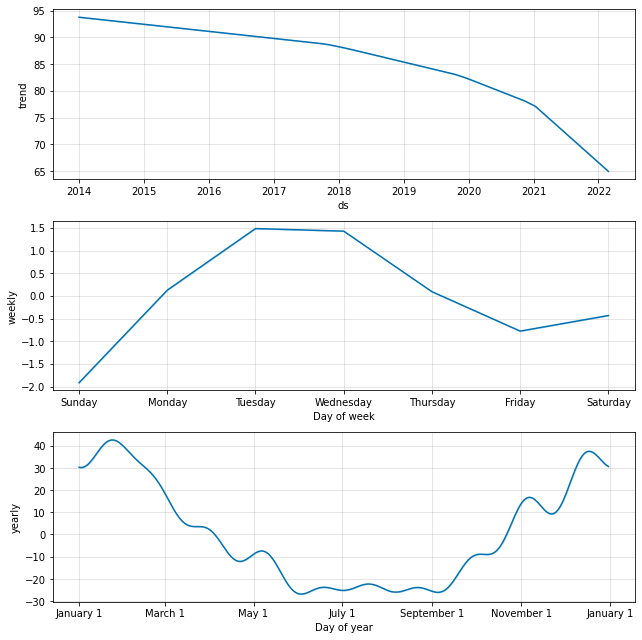

In [36]:
# set seasonality_prior_scale=0.1

my_model_seasonal_change = Prophet(seasonality_prior_scale=0.1)
my_model_seasonal_change.fit(df_pm25)
forecast = my_model_seasonal_change.predict(future_dates)
fig1 = my_model_seasonal_change.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


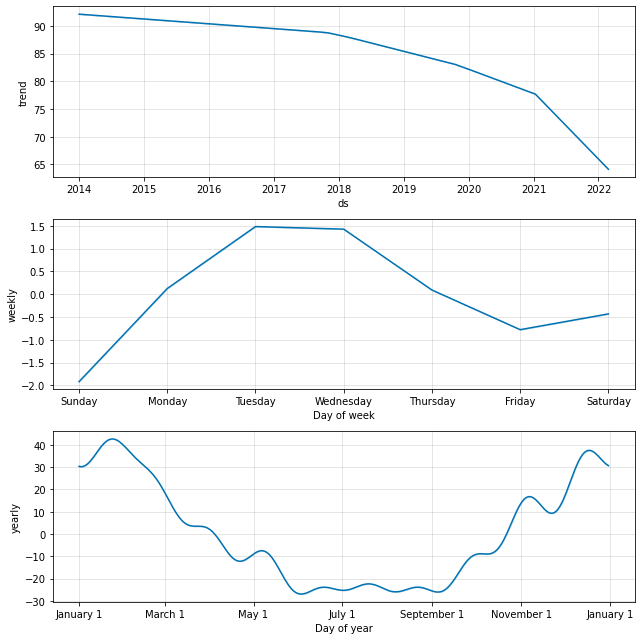

In [38]:
# set seasonality_prior_scale=10

my_model_seasonal_change = Prophet(seasonality_prior_scale=10)
my_model_seasonal_change.fit(df_pm25)
forecast = my_model_seasonal_change.predict(future_dates)
fig1 = my_model_seasonal_change.plot_components(forecast)

# สร้าง Pipeline เพื่อทำ hyperparameter tuning

In [40]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.1, 1, 5],
    'seasonality_prior_scale': [0.1, 1, 5],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mape = []  # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_pm25)  # Fit model with given params
    df_cv = cross_validation(m, initial='1820 days', period='10 days', horizon = '10 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    mape.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2021-07-24 00:00:00 and 2022-02-09 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

   changepoint_prior_scale  seasonality_prior_scale      mape
0                      0.1                      0.1  0.276197
1                      0.1                      1.0  0.276162
2                      0.1                      5.0  0.275839
3                      1.0                      0.1  0.264196
4                      1.0                      1.0  0.264065
5                      1.0                      5.0  0.264155
6                      5.0                      0.1  0.258828
7                      5.0                      1.0  0.260399
8                      5.0                      5.0  0.259969


# Save และ Load Model

In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('../model/prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [ ]:
with open('../model/prophet_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model